## **Large Language Models (LLMs) Generated Text Detection Using Machine Learning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading the datasets**

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/drive/MyDrive/Training_Essay_Data.csv")
data2=pd.read_csv("/content/drive/MyDrive/final_test.csv")
data3=pd.read_csv("/content/drive/MyDrive/final_train.csv")

##**Data Preprocessing**

In [ ]:
print(data1["generated"].value_counts()) # for checking values.
data1.head(3)

0    17508
1    11637
Name: generated, dtype: int64


,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1


In [ ]:
print(data2["label"].value_counts())
data2.head(3)

0    55845
1    30742
Name: label, dtype: int64


,text,label
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0


In [ ]:
print(data3["label"].value_counts())
data3.head(3)

0    222154
1    124823
Name: label, dtype: int64


,text,label
0,We should keep the Electoral College for a num...,0
1,More and more money is spent on building theat...,1
2,Limiting car usage can actually be effective b...,0


In [ ]:
# rename the column names of data2 and data3
data2 = data2.rename(columns={'label': 'generated'})
data3 = data3.rename(columns={'label': 'generated'})

##**Concatinating datasets**

In [ ]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [ ]:
data.isnull().sum()

text         0
generated    0
dtype: int64

In [ ]:
data["generated"].value_counts()

0    295507
1    167202
Name: generated, dtype: int64

##**Imbalance Classes**

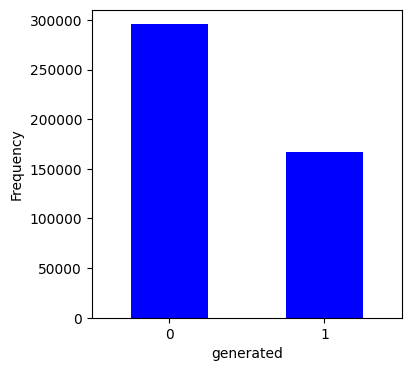

In [ ]:
import matplotlib.pyplot as plt

offer = data['generated']
offer_sum = offer.value_counts()
plt.figure(figsize = (4,4))
offer_sum.plot(kind='bar',color='blue')
plt.xlabel('generated')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

###**Balancing classes**

In [ ]:
# Count the occurrences of each class
class_counts = data['generated'].value_counts()

# Find the minority and majority class labels
minority_class_label = class_counts.idxmin()
majority_class_label = class_counts.idxmax()

# Count the difference in occurrences between the two classes
class_difference = class_counts[majority_class_label] - class_counts[minority_class_label]

# Sample from the majority class to match the minority class
data = data.drop(data[data['generated'] == majority_class_label].sample(n=class_difference).index)


In [ ]:
data['generated'].value_counts()

1    167202
0    167202
Name: generated, dtype: int64

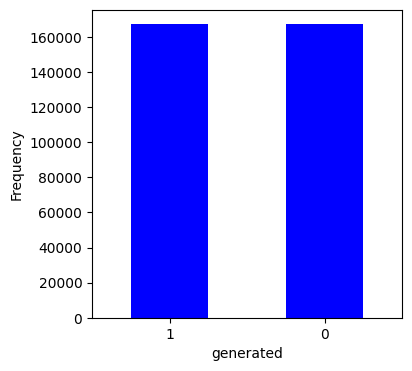

In [ ]:
import matplotlib.pyplot as plt

offer = data['generated']
offer_sum = offer.value_counts()
plt.figure(figsize = (4,4))
offer_sum.plot(kind='bar',color='blue')
plt.xlabel('generated')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### **Seperate Independent and Dependent Variables**

In [ ]:
import numpy as np
x = data['text']
y = data['generated']

##**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
#each column represents a unique word (or n-gram)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# Fit the data and transform it into a TF-IDF weighted matrix
X = tfidf_vectorizer.fit_transform(x)

##**Splitting dataset into test and train**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Building and training Model**

In [ ]:
# Initializing the logistic regression model
logreg = LogisticRegression()

# Training the model
logreg.fit(X_train, y_train)

from sklearn.pipeline import Pipeline
from sklearn import set_config

# Define a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
    ('logistic_reg', LogisticRegression())  # Logistic regression model
])

# Visualize the pipeline
set_config(display='diagram')
pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic_reg', LogisticRegression())])

##**Model Evaluation**

In [ ]:
# Predicting on the testing set
y_pred = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

# Evaluating the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy :", accuracy_train)


# Generating classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9969946621611518
Train Accuracy : 0.9978282241153097
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33624
           1       1.00      1.00      1.00     33257

    accuracy                           1.00     66881
   macro avg       1.00      1.00      1.00     66881
weighted avg       1.00      1.00      1.00     66881



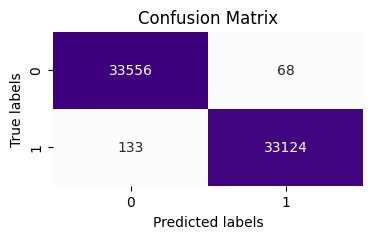

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

##**Example Usage**

In [ ]:
# prompt:write story of a little girl and three bears in a paragraph
# ex1 : chatgtp
# ex2 : copilot
# ex3 : gemini
#ex4: Human

ex1 = 'Once upon a time, in a quaint forest nestled between rolling hills and babbling brooks, lived a curious little girl named Lily. With her golden locks bouncing as she skipped through the woods, Lily stumbled upon a cozy cottage, its chimney puffing gently with wisps of smoke. Intrigued, she tiptoed closer and peeked through the window to discover three bears: Papa Bear, Mama Bear, and Baby Bear, enjoying bowls of steaming porridge at the wooden table. Lilys eyes widened with wonder as she watched the family of bears, her heart pounding with excitement at the unexpected encounter.'
ex2 = 'Once upon a time, in a quaint forest, there lived a curious little girl named **Lila**. She loved exploring the woods, and one day, she stumbled upon a cozy cottage. The door was ajar, and inside, she found three bowls of porridge: one too hot, another too cold, and the third just right. As she tasted the porridge, she heard a creaking sound. To her surprise, three bears entered the room—the **papa bear**, the **mama bear**, and the **baby bear**. Lilas eyes widened, and she darted out of the cottage, leaving behind a trail of giggles and a memory that would last a lifetime. 🌿🐻'
ex3 = 'Three curious little girls, Lily, Lola, and Luna, stumbled upon a cozy cottage in the woods. Peeking inside, they found three bowls of porridge - one steaming hot, one lukewarm, and one just right. Tempted, they each took a spoonful, with Lily yelping at the heat, Lola shivering at the coolness, and Luna sighing contentedly. Venturing further, they tried the bears chairs - a rickety one that sent Lily tumbling, a sturdy but uncomfortable one for Lola, and a perfect fit for Luna. Upstairs, Luna discovered three beds - a hard one that bounced Lily, a too-soft one that swallowed Lola whole, and a comfy one where Luna drifted off to sleep. Just as she did, a grumpy roar shook the house, and the three girls scrambled out the window, giggling as they ran.'
ex4 = 'once upon a time a little girls came to visit woods with her parents. but she lost her parents unfortunately. while stambling in the woods she found a little house and she entered the house though she was scared. there she saw a little bit and middle size bed and a big bed. then she saw a little pot a medium size pot and then a bigger pot. Everything there was in three sizes. She found there something to eat and slept. When she wake up she saw three bears in front of her. She was scared. She ran, ran and ran away and never looked back.'
# Vectorize the cleaned text
vectorized = tfidf_vectorizer.transform([ex1])

# Make prediction using the trained logistic regression model
prediction = logreg.predict(vectorized)

# Map the predicted label to human-generated or generated by LLM
if prediction == 0:
    label = "human-generated"
else:
    label = "generated by LLM"

print("Predicted label:", label)


Predicted label: generated by LLM


##**Saving model**

In [ ]:
import pickle

# Assuming you have trained and have a trained logistic_regression_model
# Save the model to a file
with open('logistic_regression_model.pickle', 'wb') as file:
    pickle.dump(logreg, file)


In [ ]:
# Load the model from file
with open('logistic_regression_model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)